In [1]:
import pandas as pd  # data manupulation
import numpy as np #
import matplotlib.pyplot as plt #data plotting
import seaborn #for data visulization
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


[0]


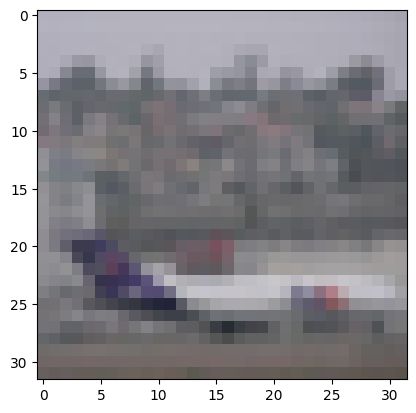

In [3]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

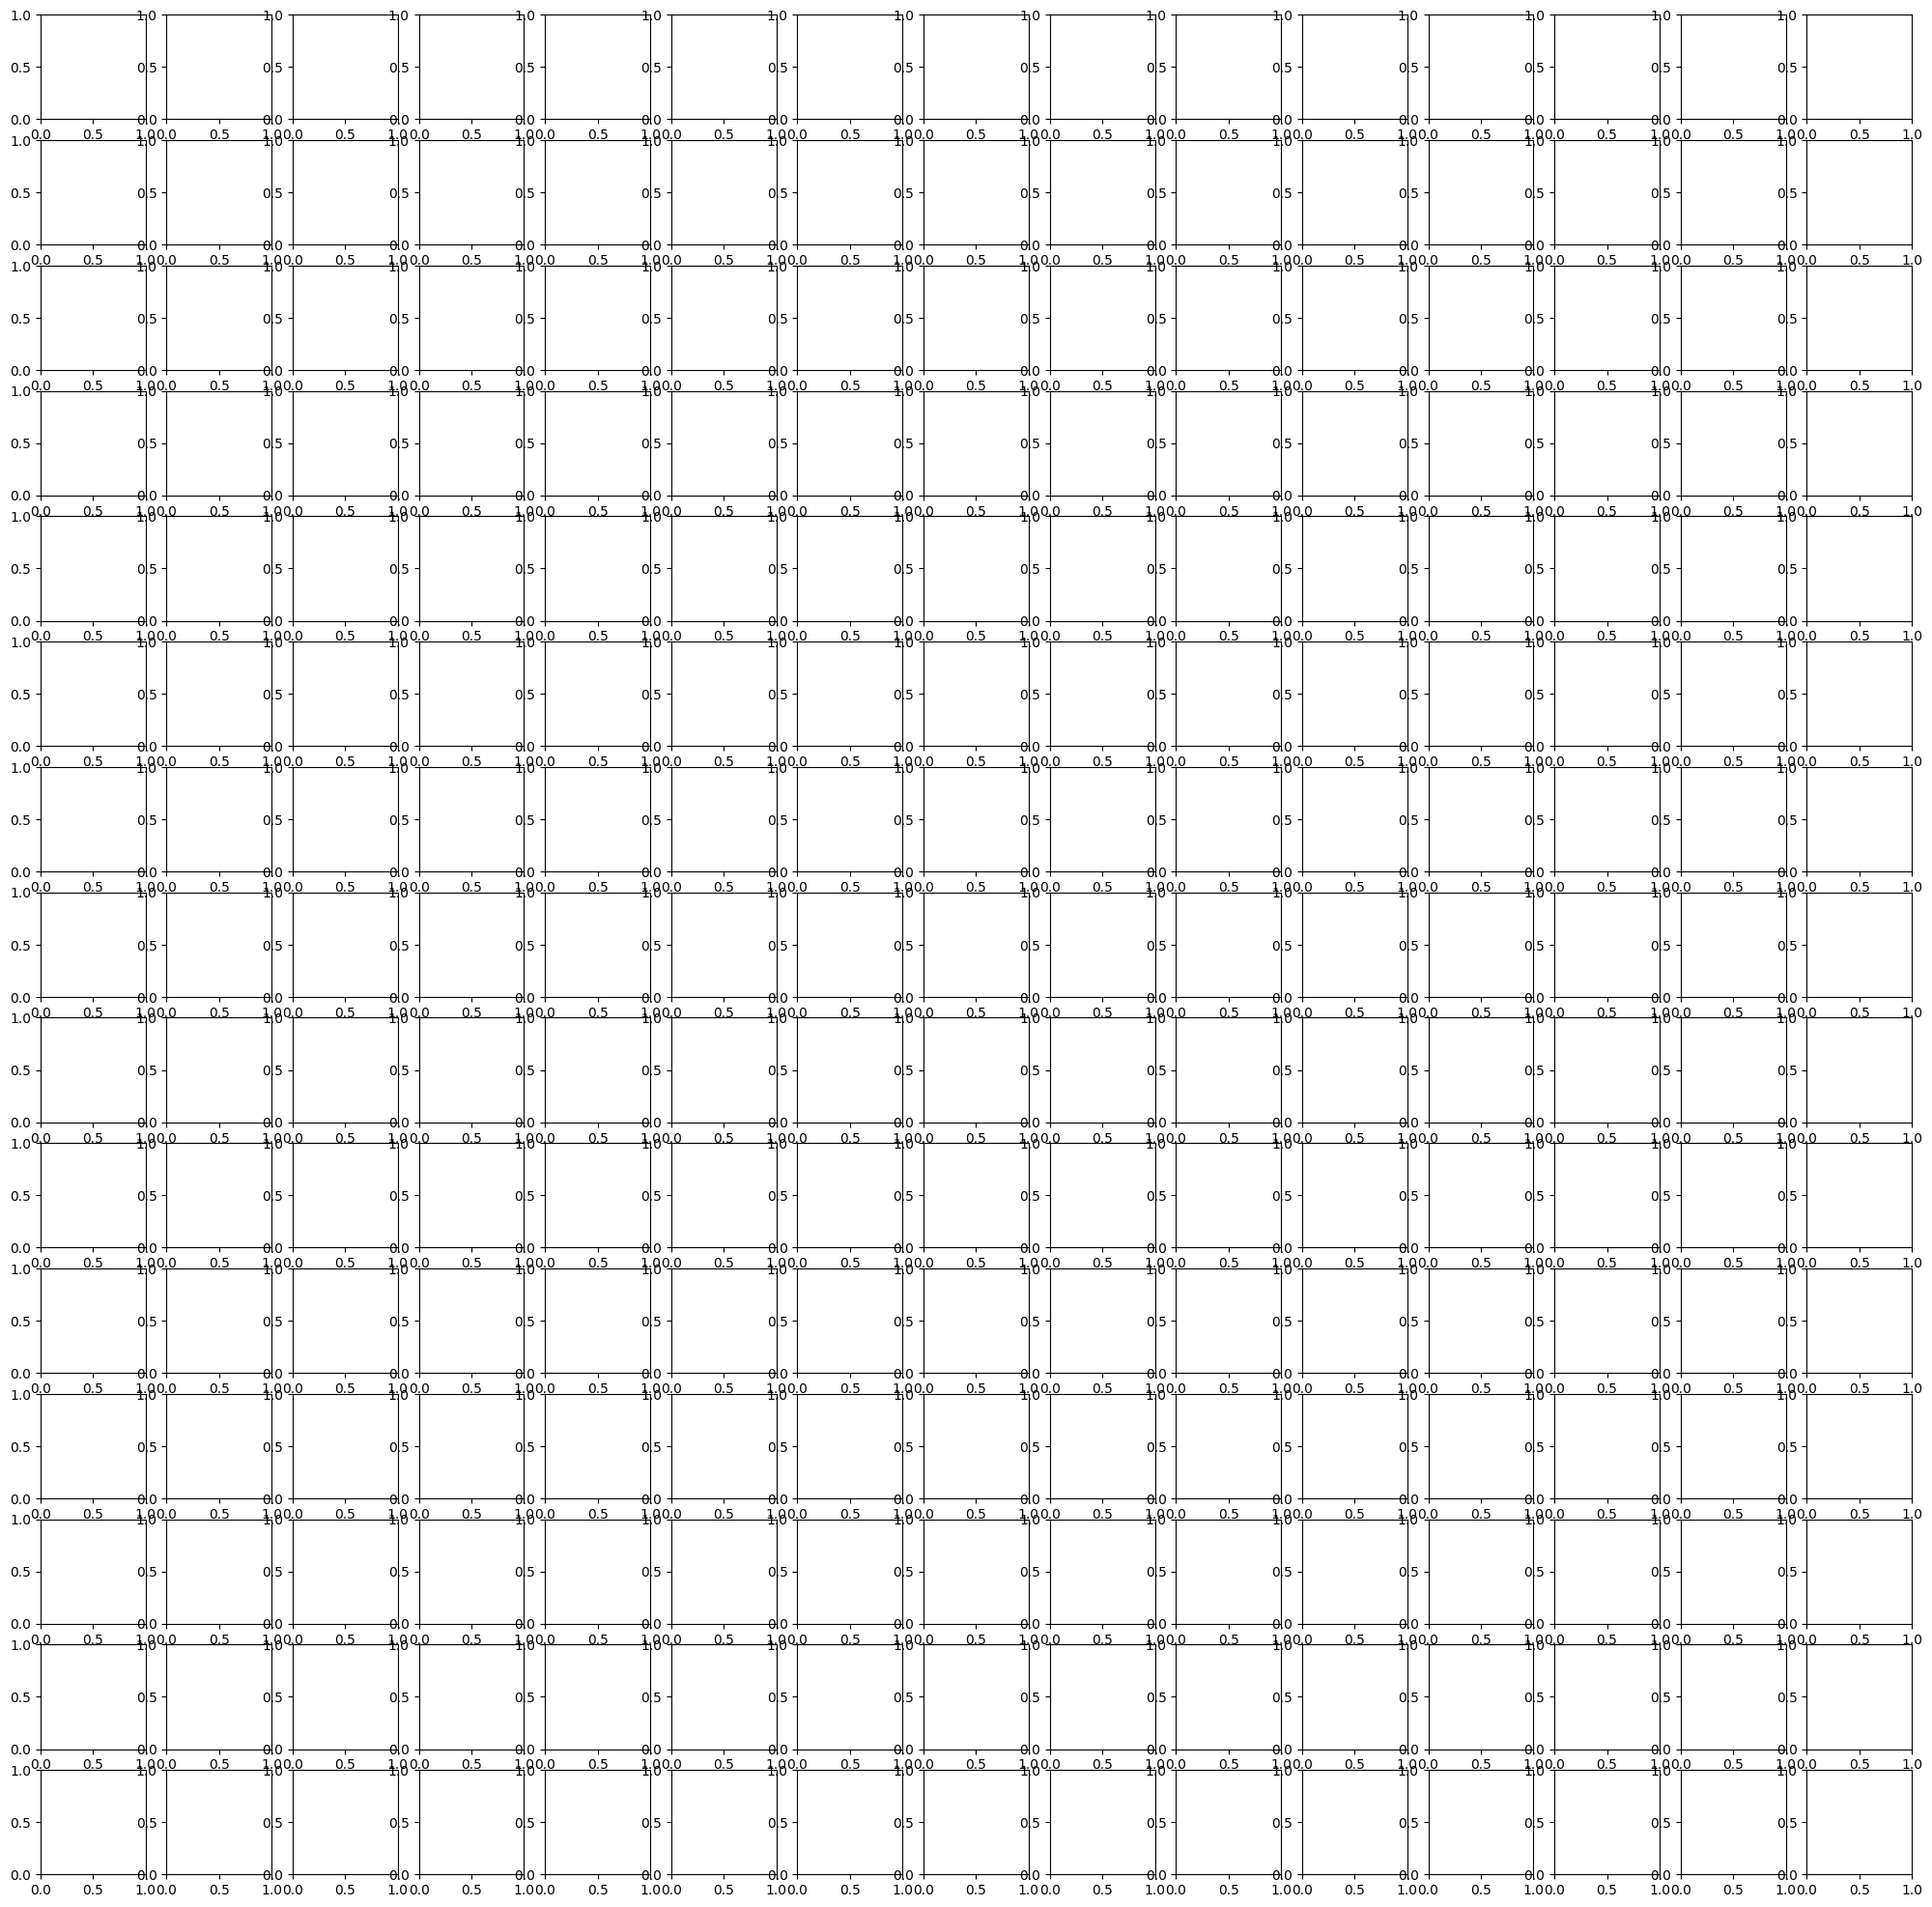

In [4]:
W_grid = 15 #width of grid
L_grid = 15  # length of grid

fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
#fig - It is the enitre figure
#axes - its the each subplot in the figure

axes = axes.ravel()
#ravel - To flatten each subplot

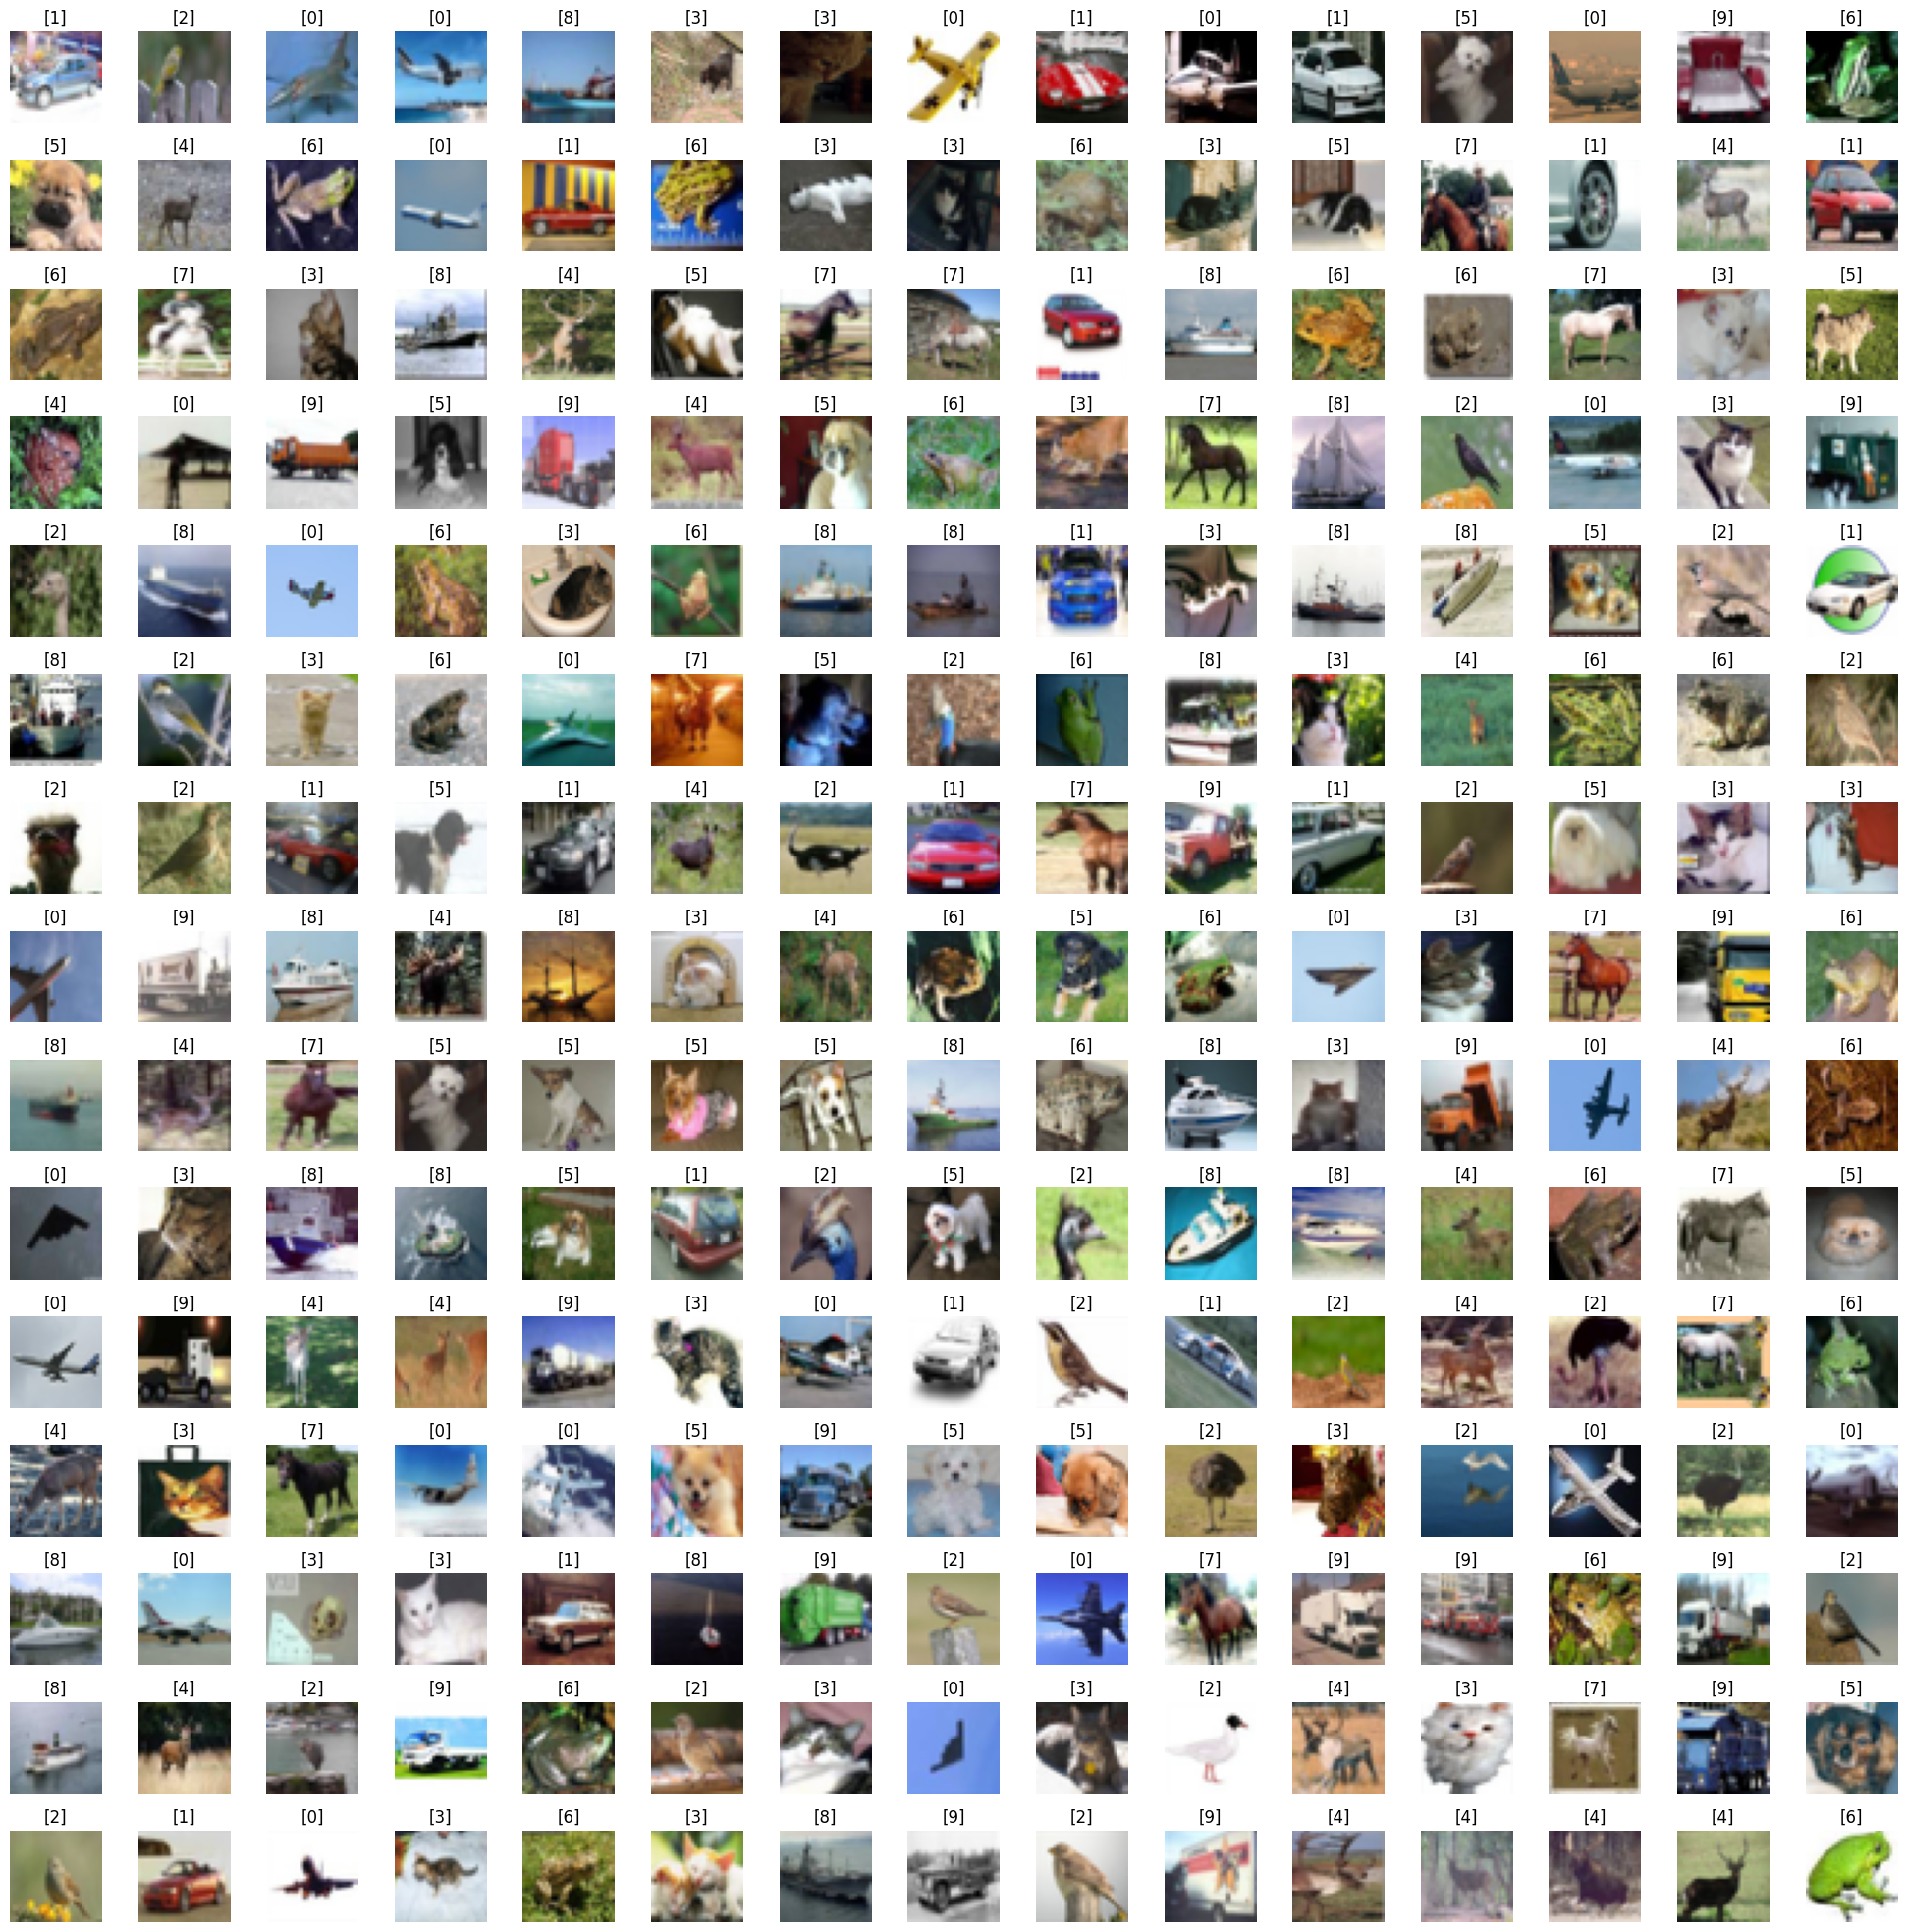

In [5]:
W_grid = 15 #width of grid
L_grid = 15  # length of grid

fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
#fig - It is the enitre figure
#axes - its the each subplot in the figure

axes = axes.ravel()
#ravel - To flatten each subplot

#np.arange is used to create an array with index 0 to 255
n_training = len(X_train)

#np.random.randint is used to randomly slect an integer value from 0 to 50000
for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index]) #Creating label for each image
  axes[i].axis('Off') #Removing the axis dimensions

plt.subplots_adjust(hspace = 0.4) #hspace is adjusting the space between two images



In [6]:
#Converting actual images into float which is later used for data augmentation

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(len(X_train))

50000


In [7]:
number_categories = 10

In [8]:
import keras
y_train = keras.utils.to_categorical(y_train, number_categories)


In [9]:
y_test = keras.utils.to_categorical(y_test, number_categories)

In [10]:
y_train
y_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [11]:
#Data Normalization which ranges from 0 to 1

X_train = X_train/255
X_test = X_test/255

In [12]:
#Extracting only the dimensions to provide the imput

Input_shape = X_train.shape[1:]
print(Input_shape)

(32, 32, 3)


In [13]:
#To build the model in sequential manner -left to right

from keras.models import Sequential

#Conv2D- for convolution
#MaxPooling2D - for subsampling (To get the maximun value of the pixels)
#AveragePooling2D - (To get the average vales of the pixels)
#Dense - To connent the neural network
#Flatten - To flatten all the feature maps to one simple array of neurons
#Dropout - To perform some regularization (Which is droping some neurons along with their weights to improve the generalization capability of network)
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

#Adam - To perform optimization (To obtain the weights of the network)
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [14]:
'''The provided code snippet appears to be part of a Convolutional Neural Network (CNN) model architecture definition in a deep learning framework such as Keras or TensorFlow. Let's break down the code:

```python
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
```

Explanation:
- `cnn_model`: This is a variable representing a sequential model in Keras or TensorFlow, to which layers are being added sequentially.
- `.add()`: This method is used to add layers to the model.
- `Conv2D`: This represents a 2-dimensional convolutional layer, commonly used in CNNs for extracting features from input images.
- `filters=32`: This parameter specifies the number of filters (or kernels) that the convolutional layer will learn. Each filter extracts different features from the input.
- `kernel_size=(3,3)`: This parameter specifies the size of the convolutional kernel or filter. In this case, it's a 3x3 kernel, meaning each filter will slide over the input image in a 3x3 window.
- `activation='relu'`: This parameter specifies the activation function applied element-wise to the output of the convolutional layer. `'relu'` stands for Rectified Linear Unit, a commonly used activation function in deep learning due to its ability to introduce non-linearity to the model.
- `input_shape=input_shape`: This parameter specifies the shape of the input data expected by the convolutional layer. `input_shape` is a tuple representing the shape of the input data, typically in the format `(height, width, channels)` for image data.

Overall, this line of code adds a 2D convolutional layer to the CNN model with 32 filters, each with a 3x3 kernel size, using the ReLU activation function, and expects input data with the shape specified by `input_shape`.'''

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


In [15]:
# Adding more layers to increase the depth of the neural network
cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

In [16]:
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))


In [17]:
#Output Layer
#Softmax function is used since the output will be 0 or 1
#Units = 10 signify the 10 classes
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [18]:
cnn_model.compile(loss= 'categorical_crossentropy', optimizer=Adam(learning_rate=1.0e-4), metrics = ['accuracy'])

In [19]:
history = cnn_model.fit( X_train, y_train, batch_size = 32, epochs = 50, validation_data=(X_test, y_test), shuffle = True)

Epoch 1/50
1563/1563 [==============================] - 180s 113ms/step - loss: 1.7252 - accuracy: 0.3654 - val_loss: 1.4492 - val_accuracy: 0.4648
Epoch 2/50
1563/1563 [==============================] - 175s 112ms/step - loss: 1.4065 - accuracy: 0.4887 - val_loss: 1.3086 - val_accuracy: 0.5285
Epoch 3/50
1563/1563 [==============================] - 180s 115ms/step - loss: 1.2697 - accuracy: 0.5462 - val_loss: 1.1789 - val_accuracy: 0.5818
Epoch 4/50
1563/1563 [==============================] - 178s 114ms/step - loss: 1.1616 - accuracy: 0.5856 - val_loss: 1.1151 - val_accuracy: 0.6051
Epoch 5/50
1563/1563 [==============================] - 175s 112ms/step - loss: 1.0762 - accuracy: 0.6188 - val_loss: 1.0256 - val_accuracy: 0.6405
Epoch 6/50
1563/1563 [==============================] - 174s 112ms/step - loss: 1.0007 - accuracy: 0.6447 - val_loss: 0.9659 - val_accuracy: 0.6634
Epoch 7/50
1563/1563 [==============================] - 177s 113ms/step - loss: 0.9338 - accuracy: 0.6721 - val_

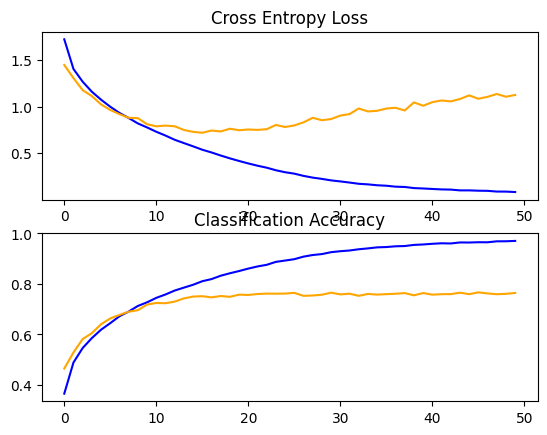

In [20]:
# plot loss
from matplotlib import pyplot
import matplotlib.pyplot as plt

def summarize_diagnostics(history):
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue',label='train')
  plt.plot(history.history['val_loss'], color='orange',label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue',label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange',label='test')

summarize_diagnostics(history)

In [21]:
evaluation = cnn_model.evaluate( X_test, y_test, batch_size = 1)
#evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 42s 4ms/step - loss: 1.1269 - accuracy: 0.7643
Test accuracy: 0.7642999887466431
